In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [36]:
df = pd.read_csv('C:/Users/dento/Desktop/NBA_predict/data/final_data.csv')

In [37]:
df

,Unnamed: 0,FG% Difference,3P% Difference,2P% Difference,FT% Difference,AST Difference,STL Difference,BLK Difference,PTS Difference,Age Difference,...,Pace Difference,3PAr Difference,TS% Difference,eFG% Difference,TOV% Difference,ORB% Difference,DRB% Difference,Attend./G Difference,Win Pct Difference,Outcome
0,0,-0.024,-0.001,0.013,-0.001,-1.4,-1.0,1.5,0.5,1.4,...,-1.0,0.154,0.002,0.005,-1.1,-0.3,1.5,-644,0.2,1
1,1,0.011,-0.011,0.017,-0.004,-0.1,-0.3,-0.5,-0.9,0.7,...,0.3,-0.030,0.005,0.003,-0.3,-2.5,-0.6,-112,-0.2,1
2,2,-0.012,-0.006,-0.018,-0.015,-2.8,-0.5,-0.2,-1.9,0.0,...,-0.1,-0.006,-0.014,-0.015,1.2,4.9,1.5,2334,-0.4,0
3,3,0.035,0.014,0.037,-0.012,4.4,1.9,0.8,13.1,0.2,...,6.2,-0.048,0.027,0.030,-0.5,1.8,1.0,-958,0.2,1
4,4,0.020,0.049,0.005,0.016,3.4,-0.8,-2.2,5.2,1.9,...,0.1,0.018,0.026,0.034,-0.5,-3.0,-1.2,1128,-0.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,1232,-0.028,-0.003,-0.028,-0.022,0.7,0.5,-0.8,-7.9,3.9,...,-4.6,0.063,-0.020,-0.018,-0.8,-1.4,0.7,1404,0.3,1
1233,1233,0.005,0.000,0.018,0.018,2.7,-0.5,0.9,7.2,-1.6,...,6.6,0.028,0.009,0.009,0.3,0.0,0.8,422,0.1,0
1234,1234,-0.001,-0.007,0.003,0.036,1.3,-0.2,-1.0,1.5,0.3,...,-1.0,0.002,-0.001,-0.001,-0.7,2.1,3.8,-2594,0.1,0
1235,1235,0.007,-0.009,0.014,-0.016,3.2,1.6,1.3,7.6,-1.9,...,6.4,-0.019,0.003,0.002,0.8,4.0,0.2,-3276,-0.1,0


In [38]:
#drop index and target
X = df.drop(columns=['Unnamed: 0', 'Outcome'])
y = df['Outcome']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create GridSearch
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,              
    n_jobs=-1,         
    verbose=2          
)


grid_search.fit(X_train, y_train)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      


print("Best Parameters:", grid_search.best_params_)

print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation Score: 0.7017381941239809


In [27]:
best_rf_model = RandomForestClassifier(
    max_depth=5,
    max_features='sqrt',
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)

best_rf_model.fit(X_train, y_train)


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = best_rf_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.6613

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.59      0.61       110
           1       0.69      0.72      0.70       138

    accuracy                           0.66       248
   macro avg       0.66      0.65      0.65       248
weighted avg       0.66      0.66      0.66       248


Confusion Matrix:
 [[65 45]
 [39 99]]


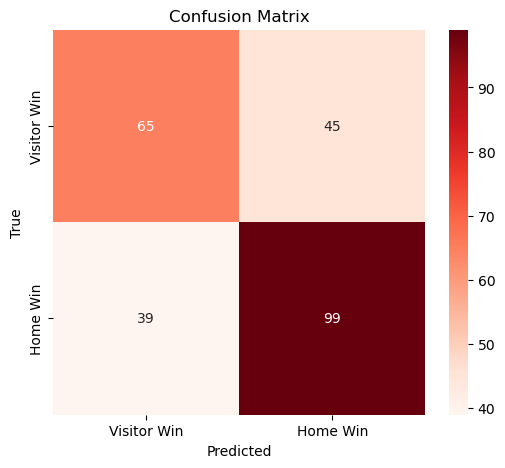

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, RocCurveDisplay


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=['Visitor Win', 'Home Win'], yticklabels=['Visitor Win', 'Home Win'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



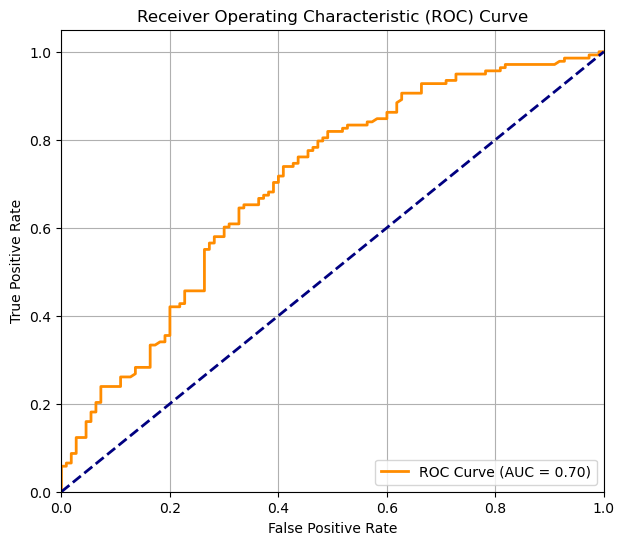

In [45]:
y_probs = best_rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


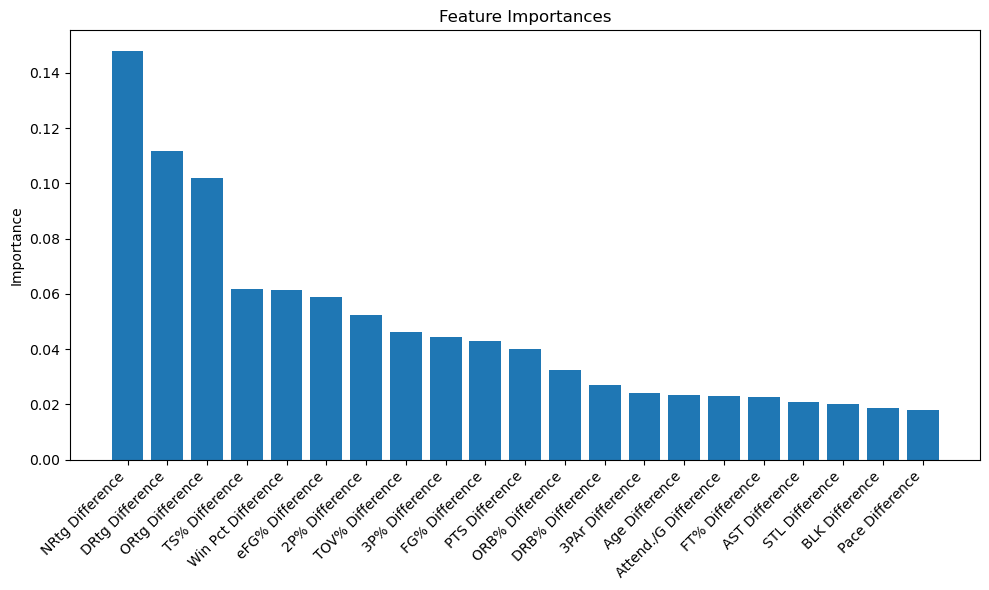

In [46]:
import matplotlib.pyplot as plt
import numpy as np

importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


In [ ]:
with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)